# CUSTOMER CHURN ANALYSIS IN TELECOM INDUSTRY

## Imports and Readings

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.impute import KNNImputer
import missingno as msno
from scipy.stats import chi2_contingency
from scipy.stats.mstats import winsorize

In [92]:
path = "C:/Users/termi/Desktop/corrupted_data.csv"
data = pd.read_csv(path)

In [93]:
# See columns
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,NaN,NaN,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,38.749828,NaN,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,NaN,DSL,Yes,...,Yes,No,No,No,One year,NaN,Mailed check,56.950000,1889.500000,No
2,3668-QPYBK,Male,0.0,NaN,No,2.0,Yes,No,DSL,NaN,...,No,No,No,No,Month-to-month,Yes,NaN,53.850000,73.395610,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,NaN,DSL,Yes,...,Yes,Yes,No,NaN,One year,NaN,Bank transfer (automatic),42.300000,1840.750000,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,NaN,NaN,70.700000,124.420433,Yes


<AxesSubplot:>

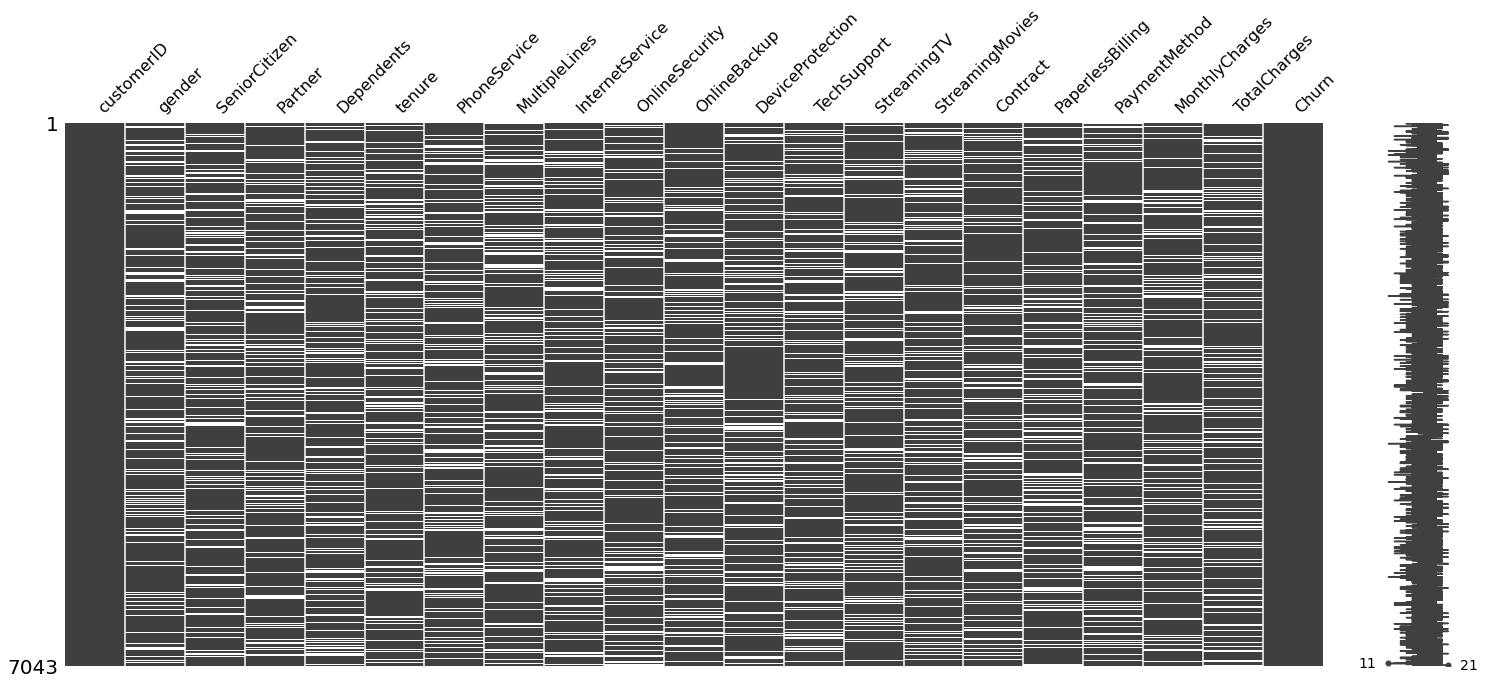

In [94]:
# See data with missing values
msno.matrix(data)

In [95]:
# See info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            5654 non-null   object 
 2   SeniorCitizen     5672 non-null   float64
 3   Partner           5642 non-null   object 
 4   Dependents        5676 non-null   object 
 5   tenure            5658 non-null   float64
 6   PhoneService      5667 non-null   object 
 7   MultipleLines     5632 non-null   object 
 8   InternetService   5637 non-null   object 
 9   OnlineSecurity    5589 non-null   object 
 10  OnlineBackup      5664 non-null   object 
 11  DeviceProtection  5658 non-null   object 
 12  TechSupport       5685 non-null   object 
 13  StreamingTV       5614 non-null   object 
 14  StreamingMovies   5607 non-null   object 
 15  Contract          5658 non-null   object 
 16  PaperlessBilling  5632 non-null   object 


In [96]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5672.0,0.166079,0.372184,0.000000,0.000000,0.000,0.0000,1.000000
tenure,5658.0,32.255709,25.446195,-30.510435,9.000000,29.000,55.0000,113.651470
MonthlyCharges,5716.0,64.773374,30.919782,-34.062838,35.845021,70.300,90.2125,146.235522
TotalCharges,5620.0,2275.373437,2255.917735,-10.312182,402.575000,1405.325,3773.3375,8684.800000


## Faulty Column Correction

In [97]:
# Faulty data, replace 'No Internet Service' with 'No'
columns_to_replace = ['OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'OnlineBackup', 'StreamingMovies']

for column in columns_to_replace:
    data[column] = data[column].replace('No internet service', 'No')

In [98]:
# Faulty data, replace 'No phone service' with 'No'
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

In [99]:
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,NaN,NaN,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,38.749828,NaN,No


## Identifying and Handling Missing Values

### Identifying Which Columns Has Missing Data

In [100]:
# Check for missing values in each column
columns_with_missing_values = data.columns[data.isnull().any()]

# Print count of missing values
print(data.isnull().sum())

# Display the columns with missing values
print("Columns with Missing Values -> ", columns_with_missing_values)

customerID             0
gender              1389
SeniorCitizen       1371
Partner             1401
Dependents          1367
tenure              1385
PhoneService        1376
MultipleLines       1411
InternetService     1406
OnlineSecurity      1454
OnlineBackup        1379
DeviceProtection    1385
TechSupport         1358
StreamingTV         1429
StreamingMovies     1436
Contract            1385
PaperlessBilling    1411
PaymentMethod       1367
MonthlyCharges      1327
TotalCharges        1423
Churn                  0
dtype: int64
Columns with Missing Values ->  Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


### Identifying and Handling Missing Values

#### Handling Missing Values on tenure, Contract, MonthlyCharges and TotalCharges

In [101]:
# Columns to check
columns_to_check = ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']

# Drop rows if all specified columns have missing values
data.dropna(subset=columns_to_check, how='all', inplace=True)

#### Handling Missing Values on Binomial Columns

##### Handling Gender

In [102]:
# Assuming your DataFrame is named 'data'
total_gender_distribution = data['gender'].value_counts(normalize=True)
total_percentage_male = total_gender_distribution.get('Male', 0)

# Create a mask for missing values in the 'gender' column
missing_mask = data['gender'].isnull()

# Fill missing values based on the condition
data.loc[missing_mask, 'gender'] = np.where(np.random.rand(sum(missing_mask)) < total_percentage_male, 'Male', 'Female')

# Show
data['gender'].value_counts()


Male      3531
Female    3501
Name: gender, dtype: int64

##### Handling Partner, Dependents, PhoneService, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling

In [103]:
# Assuming your DataFrame is named 'data'
columns_to_fill = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MultipleLines', 'OnlineBackup']

# Iterate over each column
for column in columns_to_fill:
    # Calculate the total percentage of the category 'Yes' or 'Male' (change based on the column)
    total_distribution = data[column].value_counts(normalize=True)
    total_percentage_category = total_distribution.get('Yes', 0)
    
    # Create a mask for missing values in the column
    missing_mask = data[column].isnull()
    
    # Fill missing values based on the condition
    data.loc[missing_mask, column] = np.where(np.random.rand(sum(missing_mask)) < total_percentage_category, 'Yes', 'No')

##### Handling SeniorCitizen

In [104]:
total_senior_distribution = data['SeniorCitizen'].value_counts(normalize=True)
total_percentage_senior = total_senior_distribution.get(1, 0)  # Assuming 1 represents 'Yes' for SeniorCitizen

# Create a mask for missing values in the 'SeniorCitizen' column
missing_mask_senior = data['SeniorCitizen'].isnull()

# Fill missing values based on the condition
data.loc[missing_mask_senior, 'SeniorCitizen'] = np.where(np.random.rand(sum(missing_mask_senior)) < total_percentage_senior, 1, 0)

# Show value counts after filling missing values
data['SeniorCitizen'].value_counts()


0.0    5887
1.0    1145
Name: SeniorCitizen, dtype: int64

##### Handling InternetService

In [105]:
total_internet_distribution = data['InternetService'].value_counts(normalize=True)
total_percentage_dsl = total_internet_distribution.get('DSL', 0)
total_percentage_fiber_optic = total_internet_distribution.get('Fiber optic', 0)  # Assuming 'Fiber optic' is the exact value in the column

# Create a mask for missing values in the 'InternetService' column
missing_mask_internet = data['InternetService'].isnull()

# Generate random values for each missing value
random_values = np.random.rand(sum(missing_mask_internet))

# Fill missing values based on the condition
data.loc[missing_mask_internet, 'InternetService'] = np.where(
    random_values < total_percentage_dsl, 'DSL',
    np.where(random_values < (total_percentage_dsl + total_percentage_fiber_optic), 'Fiber optic', 'No')
)

# Show value counts after filling missing values
print("InternetService:\n", data['InternetService'].value_counts())


InternetService:
 Fiber optic    3045
DSL            2441
No             1546
Name: InternetService, dtype: int64


##### Handling Contract

In [106]:
total_contract_distribution = data['Contract'].value_counts(normalize=True)
total_percentage_month_to_month = total_contract_distribution.get('Month-to-month', 0)
total_percentage_one_year = total_contract_distribution.get('One year', 0)
total_percentage_two_year = total_contract_distribution.get('Two year', 0)

# Create a mask for missing values in the 'Contract' column
missing_mask_contract = data['Contract'].isnull()

# Generate random values for each missing value
random_values_contract = np.random.rand(sum(missing_mask_contract))

# Fill missing values based on the condition
data.loc[missing_mask_contract, 'Contract'] = np.where(
    random_values_contract < total_percentage_month_to_month, 'Month-to-month',
    np.where(
        random_values_contract < (total_percentage_month_to_month + total_percentage_one_year), 'One year',
        'Two year'
    )
)

# Show value counts after filling missing values
print("Contract:\n", data['Contract'].value_counts())


Contract:
 Month-to-month    3905
Two year          1681
One year          1446
Name: Contract, dtype: int64


##### Handling PaymentMethod

In [107]:
total_payment_method_distribution = data['PaymentMethod'].value_counts(normalize=True)
total_percentage_mailed_check = total_payment_method_distribution.get('Mailed check', 0)
total_percentage_bank_transfer = total_payment_method_distribution.get('Bank transfer (automatic)', 0)
total_percentage_electronic_check = total_payment_method_distribution.get('Electronic check', 0)
total_percentage_credit_card = total_payment_method_distribution.get('Credit card (automatic)', 0)

# Create a mask for missing values in the 'PaymentMethod' column
missing_mask_payment_method = data['PaymentMethod'].isnull()

# Generate random values for each missing value
random_values_payment_method = np.random.rand(sum(missing_mask_payment_method))

# Fill missing values based on the condition
data.loc[missing_mask_payment_method, 'PaymentMethod'] = np.where(
    random_values_payment_method < total_percentage_mailed_check, 'Mailed check',
    np.where(
        random_values_payment_method < (total_percentage_mailed_check + total_percentage_bank_transfer),
        'Bank transfer (automatic)',
        np.where(
            random_values_payment_method < (total_percentage_mailed_check + total_percentage_bank_transfer + total_percentage_electronic_check),
            'Electronic check',
            'Credit card (automatic)'
        )
    )
)

# Show value counts after filling missing values
print("PaymentMethod:\n", data['PaymentMethod'].value_counts())


PaymentMethod:
 Electronic check             2358
Bank transfer (automatic)    1586
Mailed check                 1574
Credit card (automatic)      1514
Name: PaymentMethod, dtype: int64


#### Handling Remaining Columns With KNN

In [108]:
# Identify columns with numeric missing values
columns_with_missing = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation to selected columns with missing values
data[columns_with_missing] = knn_imputer.fit_transform(data[columns_with_missing])

# Show information after imputation
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   float64
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<AxesSubplot:>

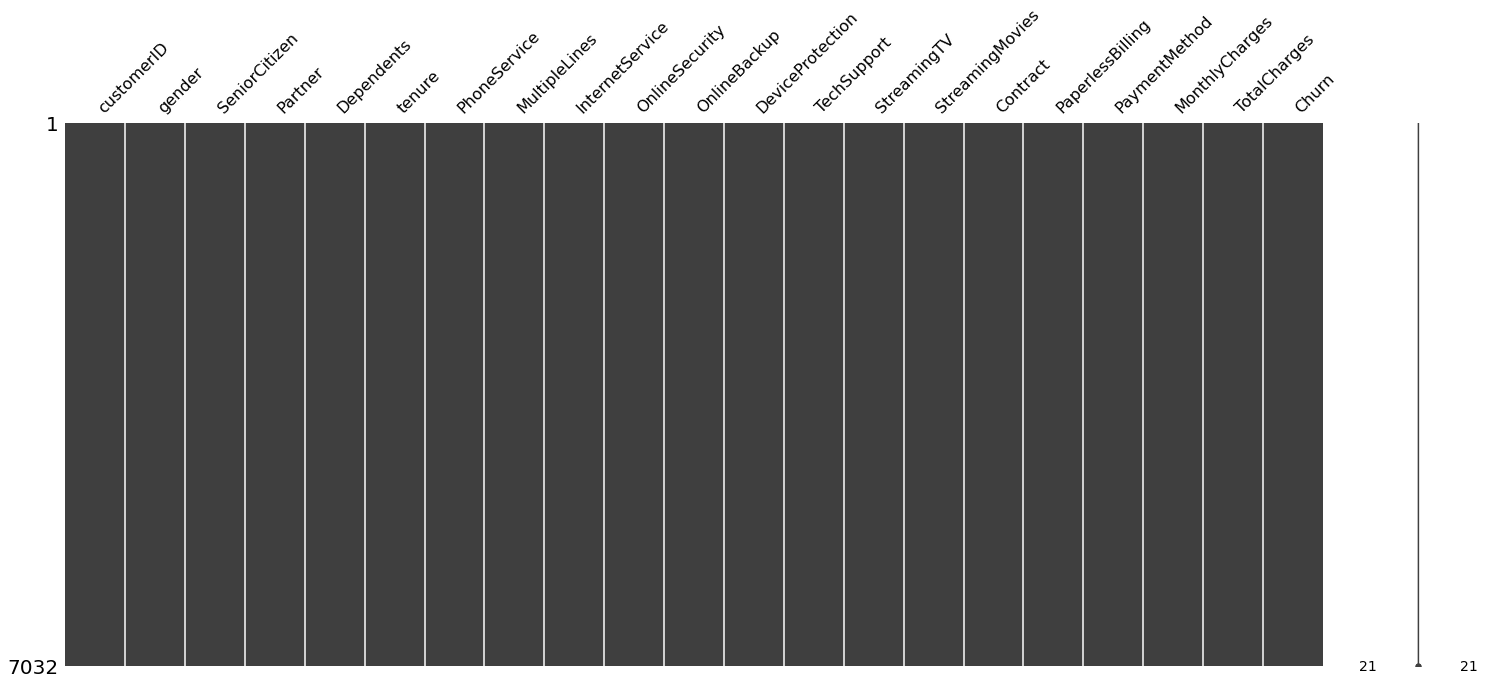

In [109]:
msno.matrix(data)

## Outliers Detection With IQR

### Outlier Detection

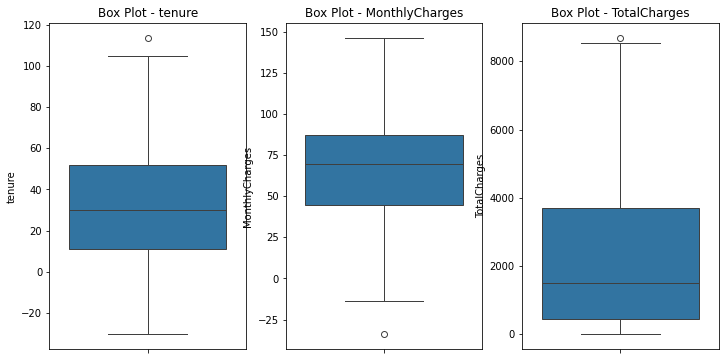

In [110]:
numeric_columns = ["tenure", "MonthlyCharges", "TotalCharges"]

plt.figure(figsize=(12, 6))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, len(numeric_columns), i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot - {column}')

plt.show()

### Removing Outliers From MonthlyCharges

In [111]:
Q1 = data['MonthlyCharges'].quantile(0.25)
Q3 = data['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and drop outliers
outliers_mask = (data['MonthlyCharges'] < lower_bound) | (data['MonthlyCharges'] > upper_bound)
data = data[~outliers_mask]

### Handling Outliers from tenure

In [112]:
Q1 = data['tenure'].quantile(0.25)
Q3 = data['tenure'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and drop outliers
outliers_mask = (data['tenure'] < lower_bound) | (data['tenure'] > upper_bound)
data = data[~outliers_mask]

### Handling Outliers from Total Charges

In [113]:
# Specify the percentage of winsorization
winsorization_percentage = 1  # You can adjust this based on your data distribution

# Winsorize the 'TotalCharges' column
data['TotalCharges'] = winsorize(data['TotalCharges'], limits=[0, winsorization_percentage / 100.0])

## Transformations and Encodings

### Transform Yes/No Values to 1/0

In [114]:
# List of columns to be converted
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'PaperlessBilling', 'Churn']

# Loop through each column and replace 'Yes' with 1 and 'No' with 0
for column in yes_no_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

### Apply Label Encoding to InternetService, SeniorCitizen, Contract and PaymentMethod

In [115]:
# Replace values in the 'InternetService' column using the mapping
data['InternetService'] = data['InternetService'].map({'DSL': 2, 'Fiber optic': 1, 'No': 0})

# Replace values in the 'Contract' column using the mapping
data['Contract'] = data['Contract'].map({'Two year': 3, 'One year': 2, 'Month-to-month': 1})

# Replace values in the 'SeniorCitizen' column using the mapping
data['SeniorCitizen'] = data['SeniorCitizen'].map({0.0: 0, 1.0: 1})

# Replace values in the 'gender' column using the mapping
data['gender'] = data['gender'].map({"Male": 1, "Female": 0})

# PaymentMethod  ->  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)']
data['PaymentMethod'] = data['PaymentMethod'].map({'Electronic check': 4, 'Mailed check': 3, 'Bank transfer (automatic)': 2, 'Credit card (automatic)':1})

### Applying Min-Max Scaling

In [116]:
# Apply Min-Max normalization to 'tenure', 'MonthlyCharges', and 'TotalCharges'
scaler = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

## Feature Engineering

### Creating ChurnRiskScore Feature

In [117]:
EPSILON = 0.001
data['ChurnRiskScore'] = data['PaymentMethod'] / ((data['Contract'] * (data['tenure']) + EPSILON))

# Apply Min-Max normalization to 'ChurnRiskScore'
data['ChurnRiskScore'] = scaler.fit_transform(data['ChurnRiskScore'].values.reshape(-1, 1))

### Removing Unnecessary (Non-Correlated) Features

#### Identifying Which Features are Correlated

##### Categorical Values

In [118]:
# These are the categorical features
columns_of_interest = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']

correlateds = []
non_correlateds = []

# Create a contingency table for each column with 'Churn'
for column in columns_of_interest:
    contingency_table = pd.crosstab(data[column], data['Churn'])
    
    # Perform chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    # Check significance level (e.g., 0.05)
    if p < 0.05:
        correlateds.append(column)
    else:
        non_correlateds.append(column)
    
print("These columns has a significant association with Churn.")
print(correlateds)

print("\n")

print("These columns has no significant association with Churn.")
print(non_correlateds)

These columns has a significant association with Churn.
['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']


These columns has no significant association with Churn.
['gender']


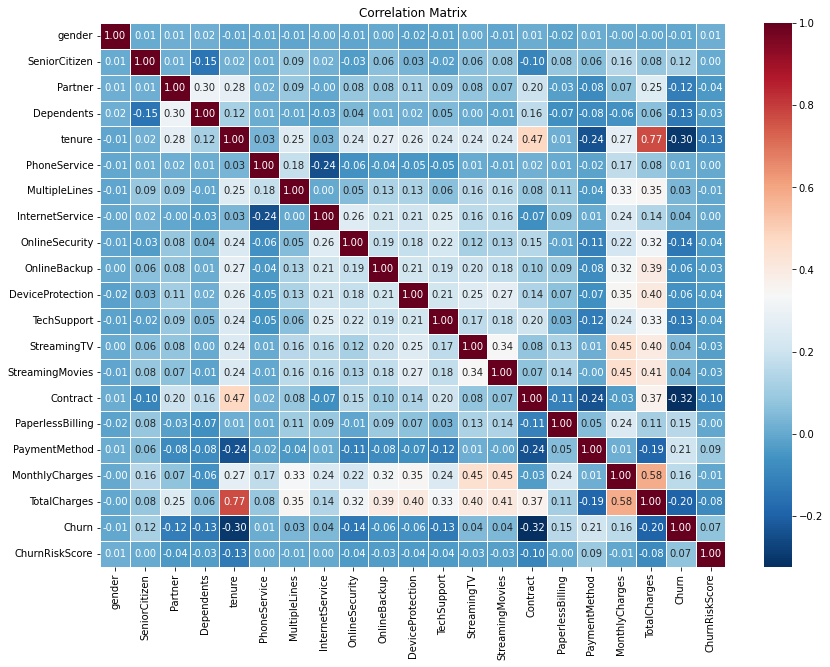

In [119]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##### Numerical Values

In [120]:
# Mutual information
# Assuming 'data' is your DataFrame
X = data.drop(['customerID', 'Churn'], axis=1)  # removed features 
y = data['Churn']  # Target variable

correlateds = []
non_correlateds = []

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y)

# Display scores for each feature
for feature, score in zip(X.columns, mi_scores):
    if score > 0.004:
        correlateds.append(feature)
    else:
        non_correlateds.append(feature)
    
print("These columns has a significant association with Churn.")
print(correlateds)

print("\n")

print("These columns has no significant association with Churn.")
print(non_correlateds)

These columns has a significant association with Churn.
['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'ChurnRiskScore']


These columns has no significant association with Churn.
['Partner', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


#### Remove Non-Correlated Features

In [121]:
# List of columns to drop
columns_to_drop = ['gender', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

## Apply These Changes to a New CSV File

In [122]:
# Writing preprocessed data back to csv
preprocessed_path = "C:/Users/termi/Desktop/preprocessed_data.csv"
data.to_csv(preprocessed_path, index=False)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7030 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7030 non-null   object 
 1   SeniorCitizen     7030 non-null   int64  
 2   Partner           7030 non-null   int64  
 3   Dependents        7030 non-null   int64  
 4   tenure            7030 non-null   float64
 5   InternetService   7030 non-null   int64  
 6   OnlineSecurity    7030 non-null   int64  
 7   TechSupport       7030 non-null   int64  
 8   Contract          7030 non-null   int64  
 9   PaperlessBilling  7030 non-null   int64  
 10  PaymentMethod     7030 non-null   int64  
 11  MonthlyCharges    7030 non-null   float64
 12  TotalCharges      7030 non-null   float64
 13  Churn             7030 non-null   int64  
 14  ChurnRiskScore    7030 non-null   float64
dtypes: float64(4), int64(10), object(1)
memory usage: 878.8+ KB
